# Lecture 12: Thyroid Example

In [1]:
# load imports
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
# load dataset
thyroid_df = pd.read_csv('thyroid_data.csv')

# look at the shape of data
thyroid_df.shape

(383, 17)

In [3]:
# look at dataframe
thyroid_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
# look at data on recurrence
thyroid_df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [5]:
# define list of column name to one hot encode
cols_to_exclude = ['Age', 'Recurred']

categorical_cols = [col for col in thyroid_df.columns if col not in cols_to_exclude]

categorical_cols

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [6]:
# define the one hot encoding format
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [7]:
# apply the transformer
transformed_data = column_transformer.fit_transform(thyroid_df)

transformed_data

array([[1.0, 0.0, 1.0, ..., 0.0, 27, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 34, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 30, 'No'],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 72, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 61, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 67, 'Yes']],
      shape=(383, 56), dtype=object)

In [8]:
pd.DataFrame(transformed_data).head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No


In [9]:
# get the list of column names
encoded_cols = column_transformer.named_transformers_['encoder'].get_feature_names_out(categorical_cols)
encoded_cols

array(['Gender_F', 'Gender_M', 'Smoking_No', 'Smoking_Yes',
       'Hx Smoking_No', 'Hx Smoking_Yes', 'Hx Radiothreapy_No',
       'Hx Radiothreapy_Yes', 'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', '

In [10]:
# convert to a encoded column names to a list
encoded_cols = list(encoded_cols)

# add the age and recurred column names
encoded_cols.append('Age')
encoded_cols.append('Recurred')

encoded_cols

['Gender_F',
 'Gender_M',
 'Smoking_No',
 'Smoking_Yes',
 'Hx Smoking_No',
 'Hx Smoking_Yes',
 'Hx Radiothreapy_No',
 'Hx Radiothreapy_Yes',
 'Thyroid Function_Clinical Hyperthyroidism',
 'Thyroid Function_Clinical Hypothyroidism',
 'Thyroid Function_Euthyroid',
 'Thyroid Function_Subclinical Hyperthyroidism',
 'Thyroid Function_Subclinical Hypothyroidism',
 'Physical Examination_Diffuse goiter',
 'Physical Examination_Multinodular goiter',
 'Physical Examination_Normal',
 'Physical Examination_Single nodular goiter-left',
 'Physical Examination_Single nodular goiter-right',
 'Adenopathy_Bilateral',
 'Adenopathy_Extensive',
 'Adenopathy_Left',
 'Adenopathy_No',
 'Adenopathy_Posterior',
 'Adenopathy_Right',
 'Pathology_Follicular',
 'Pathology_Hurthel cell',
 'Pathology_Micropapillary',
 'Pathology_Papillary',
 'Focality_Multi-Focal',
 'Focality_Uni-Focal',
 'Risk_High',
 'Risk_Intermediate',
 'Risk_Low',
 'T_T1a',
 'T_T1b',
 'T_T2',
 'T_T3a',
 'T_T3b',
 'T_T4a',
 'T_T4b',
 'N_N0',
 'N_

In [11]:
# convert transformed data to a dataframe
transformed_df = pd.DataFrame(transformed_data, columns=encoded_cols)

transformed_df

,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age,Recurred
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,72,Yes
379,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,81,Yes
380,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72,Yes
381,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61,Yes


In [12]:
transformed_df.shape

(383, 56)

In [13]:
# make the X and y variables
X = transformed_df.drop('Recurred', axis=1)
y = transformed_df['Recurred']

X.shape, y.shape

((383, 55), (383,))

In [14]:
# do train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

X_train.shape

(283, 55)

In [15]:
# define the parameter grid
param_grid = {
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 8],
    'max_features': ['sqrt'],
    'n_estimators': [30, 60, 90]
}

In [16]:
# make the random forest classifier
rf_classifier = RandomForestClassifier()

# make the grid object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, scoring='accuracy')

In [17]:
# run the grid search
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_params

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 60}

In [18]:
best_score = grid_search.best_score_

best_score

np.float64(0.9610927979222855)

In [19]:
# define a model with best parameters
final_model = RandomForestClassifier(
    class_weight='balanced',
    criterion='gini',
    max_depth=4,
    max_features='sqrt',
    n_estimators=60
)

# fit the model on all training data
final_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=60)

In [20]:
# get model score
final_model.score(X_test, y_test)

0.95

In [21]:
# get feature importance
feature_importances = final_model.feature_importances_

feature_importances

array([1.39343175e-02, 5.03495690e-03, 4.13851763e-03, 3.98674553e-03,
       1.07393349e-03, 6.61453264e-04, 3.85493250e-05, 1.21191084e-03,
       1.46116378e-03, 1.65516037e-04, 3.46136315e-03, 3.84955024e-05,
       7.74121985e-04, 0.00000000e+00, 3.37276677e-03, 5.48419939e-04,
       2.82373076e-03, 1.87730050e-03, 9.74460025e-03, 9.24366407e-05,
       3.29369098e-03, 4.58295732e-02, 0.00000000e+00, 4.37121426e-03,
       7.14242930e-04, 2.69899149e-03, 1.43379684e-03, 2.27388513e-03,
       1.77448400e-02, 1.21158114e-02, 3.10740210e-02, 5.36811537e-02,
       1.18675628e-01, 4.33845419e-03, 1.24960645e-03, 1.73577248e-02,
       4.83359312e-03, 1.25358644e-03, 7.81010662e-03, 3.35014641e-04,
       7.74834587e-02, 3.98928609e-03, 5.44926193e-02, 2.81659962e-05,
       3.99337200e-03, 2.65098294e-02, 2.67085278e-03, 1.67986905e-04,
       3.53386052e-04, 1.69887963e-04, 8.15082802e-03, 1.61208193e-01,
       1.42025581e-02, 2.27015904e-01, 3.40384363e-02])

In [22]:
# convert to dataframe
feature_importance_df = pd.DataFrame({
    'feature': X.columns, 
    'importance': feature_importances
})

# sort the dataframe
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

feature_importance_df

,feature,importance
53,Response_Structural Incomplete,0.227016
51,Response_Excellent,0.161208
32,Risk_Low,0.118676
40,N_N0,0.077483
42,N_N1b,0.054493
31,Risk_Intermediate,0.053681
21,Adenopathy_No,0.045830
54,Age,0.034038
30,Risk_High,0.031074
45,Stage_I,0.026510


<Axes: xlabel='feature'>

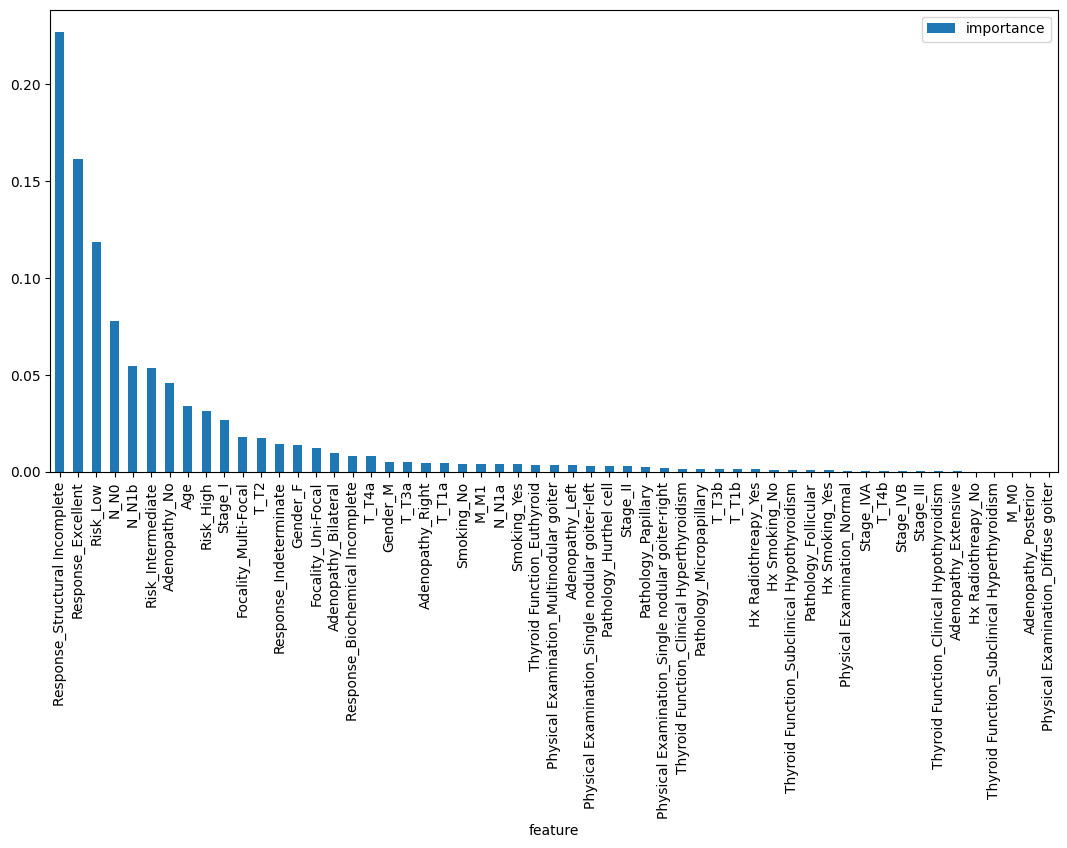

In [23]:
# plot the feature importance
feature_importance_df.plot.bar(x='feature', y='importance', figsize=(13, 6))

In [26]:
# look at confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = final_model.predict(X_test)

con_matrix = confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])

con_matrix 

array([[28,  1],
       [ 4, 67]])

In [28]:
# look at classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels=['Yes', 'No'])

print(report)

              precision    recall  f1-score   support

         Yes       0.88      0.97      0.92        29
          No       0.99      0.94      0.96        71

    accuracy                           0.95       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100

